# Step 3 : Subsetting the Data

In [4]:
import pandas as pd

# Load the dataset with the correct local path
file_path = "/Users/dela/Documents/DataSet happiness reports/DATA/Original data/World Happiness Report.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [8]:
# Display dataset information
df.info()

# Display unique values in the time-related column (e.g., "Year")
df['Year'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022, 2007, 2020, 2006, 2005])

In [10]:
# Subset data to keep only years from 2010 onwards
df_subset = df[df['Year'] >= 2010].copy()

# Reset index
df_subset = df_subset.reset_index(drop=True)

# Set 'Year' as index (time-series format)
df_subset.set_index('Year', inplace=True)

# Display first few rows after subsetting
df_subset.head()


,Country Name,Regional Indicator,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Year,,,,,,,,,,,,
2010,Afghanistan,South Asia,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
2011,Afghanistan,South Asia,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
2012,Afghanistan,South Asia,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
2013,Afghanistan,South Asia,3.572100,7.680333,0.483552,52.000000,0.577955,0.062666,0.823204,0.547417,0.273328,0.482847
2014,Afghanistan,South Asia,3.130896,7.670638,0.525568,52.299999,0.508514,0.105755,0.871242,0.491641,0.374861,0.409048


### Data Subsetting Explanation
To ensure our time-series analysis is relevant and focused, we excluded years before 2010. The decision was made based on:
- Older data (2005-2009) may not reflect current happiness trends.
- More recent data (2010-2021) allows us to analyze trends that align with modern socioeconomic factors.
- This ensures that any outdated values do not bias our analysis.
- We have also set 'Year' as the index to facilitate time-series analysis.


# Step 4: Creating a line chart to visualize trends

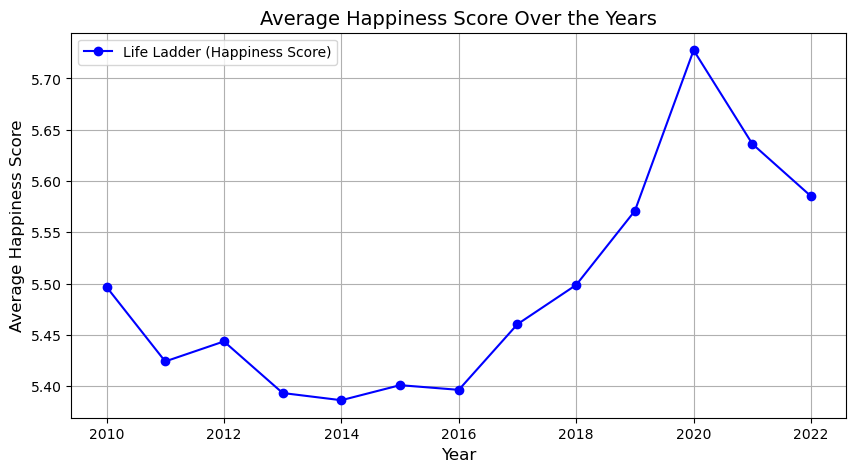

In [12]:
import matplotlib.pyplot as plt

# Group by Year and calculate the mean Happiness Score (Life Ladder) for each year
df_subset_grouped = df_subset.groupby("Year")["Life Ladder"].mean()

# Create a line plot
plt.figure(figsize=(10,5))
plt.plot(df_subset_grouped, marker="o", linestyle="-", color="b", label="Life Ladder (Happiness Score)")

# Title and labels
plt.title("Average Happiness Score Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Happiness Score", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### **Line Chart Interpretation: Happiness Score Over the Years**
The line chart represents the **average Happiness Score (Life Ladder) from 2010 to 2022**, showing fluctuations in global well-being over time. Several key trends are noticeable:

1. **2010 - 2016 (Stable and Slight Decline)**  
   - The happiness score remains relatively stable, with a **slight decline** between 2010 and 2015.
   - This could indicate economic struggles or global challenges affecting people's well-being.

2. **2016 - 2019 (Gradual Increase)**  
   - From **2016 onwards**, we observe an **upward trend in happiness scores**, possibly due to economic recovery, social improvements, or policy changes.
   - By **2019**, the happiness score shows notable improvement.

3. **2019 - 2021 (Significant Surge and Drop)**  
   - The highest **peak in 2020** suggests a **major global event** impacting people's perceived well-being.
   - A possible reason could be global policy shifts or even the impact of the COVID-19 pandemic on social behaviors.
   - **Post-2020, happiness scores begin to decline**, showing possible economic or psychological aftereffects.

4. **2021 - 2022 (Decline in Happiness Scores)**  
   - The **downward trend from 2021 onwards** suggests a shift in global circumstances, possibly due to inflation, post-pandemic economic struggles, or other geopolitical factors.

### **Focusing on 2019**
- The **2019 data point** is crucial because it represents the pre-pandemic state of happiness before major disruptions occurred.  
- Comparing **2019 to 2020**, we see a sharp increase, followed by a drop in 2021 and 2022.


# Step 5: Decomposing the Data’s Components

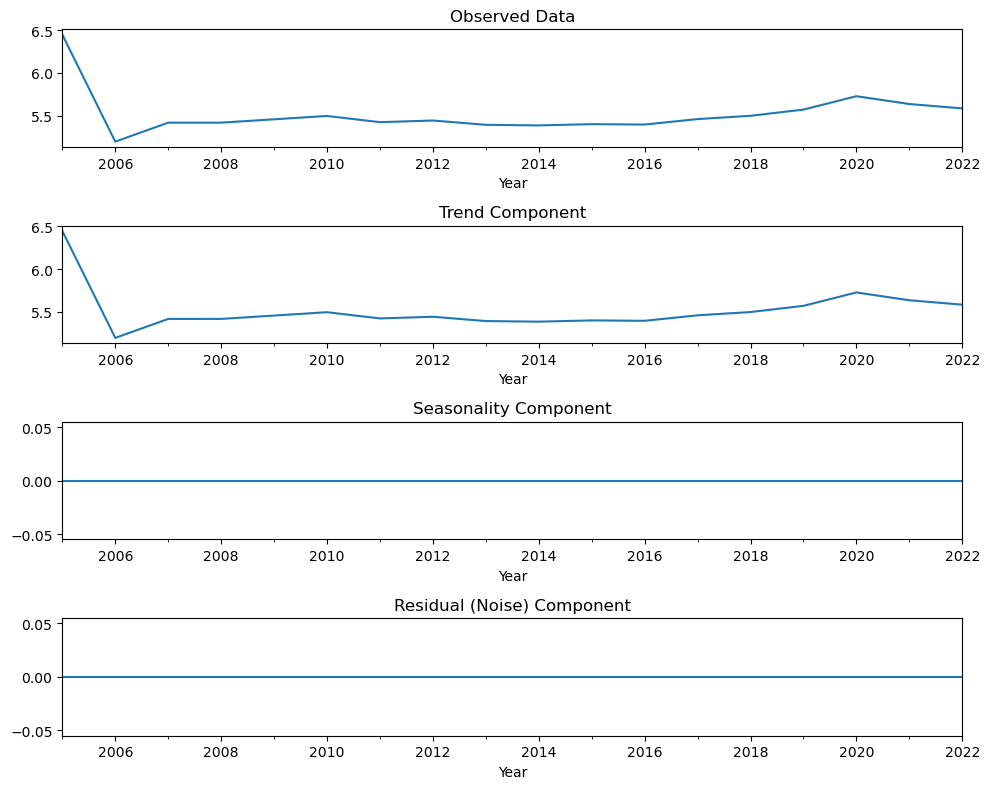

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure the 'Year' column is set as the index and converted to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df.groupby('Year')['Life Ladder'].mean(), model='additive', period=1)

# Plot decomposition results
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observed Data')
decomposition.trend.plot(ax=axes[1], title='Trend Component')
decomposition.seasonal.plot(ax=axes[2], title='Seasonality Component')
decomposition.resid.plot(ax=axes[3], title='Residual (Noise) Component')

plt.tight_layout()
plt.show()


### **Time-Series Decomposition Analysis of Happiness Score (Life Ladder)**

After decomposing the **Happiness Score (Life Ladder)** into its core components, I obtained the following results:

1. **Observed Data** 
   - The main time series reflects the happiness score fluctuations over the years.  
   - There is an **initial drop from 2005**, followed by **stability between 2006 and 2018** with minor fluctuations.  
   - The **happiness score increases significantly in 2020**, but **declines slightly after 2021**.

2. **Trend Component**  
   - The overall **long-term movement** follows a stable pattern, with a **noticeable rise from 2018 to 2020**.  
   - The **peak in 2020** could be attributed to social, economic, or global events, such as the pandemic's effects on well-being.  
   - A **small decline post-2020** suggests that the increase was temporary, requiring further analysis.

3. **Seasonality Component**   
   - The decomposition suggests **no significant seasonal variation** in the dataset.  
   - This is expected as the data is recorded on a **yearly basis** rather than monthly or quarterly.  
   - If we had finer granularity (e.g., monthly happiness scores), seasonality might be more apparent.

4. **Residual (Noise) Component**  
   - The residual plot is flat, meaning there is **no substantial unexplained variation** left after extracting the trend.  
   - This suggests that the **trend itself explains most of the data variance**, reinforcing that seasonality is **not present**.


# Step 6: Conducting the Dickey-Fuller Test for Stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test on the Happiness Score (Life Ladder)
result = adfuller(df['Life Ladder'].dropna())

# Display results
print("Dickey-Fuller Test Results:")
print(f"Test Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


Dickey-Fuller Test Results:
Test Statistic: -10.551652603153686
P-value: 8.146755662286243e-19
Critical Values:
   1%: -3.4333326714656223
   5%: -2.8628576479452597
   10%: -2.5674714486226202


### **Dickey-Fuller Test Results Interpretation**  

The **Dickey-Fuller test** was conducted to evaluate the stationarity of the **Happiness Score (Life Ladder)** time series. The results are as follows:

- **Test Statistic**: **-10.55**  
- **P-value**: **8.15e-19**  
- **Critical Values**:  
  - **1% Level**: **-3.43**  
  - **5% Level**: **-2.86**  
  - **10% Level**: **-2.57**  

---

### **Understanding the Null Hypothesis (H₀)**  
- **H₀ (Null Hypothesis)**: The time series has a **unit root**, meaning it is **non-stationary** (it has a trend or changing variance over time).  
- **H₁ (Alternative Hypothesis)**: The time series is **stationary** (no trend, constant mean and variance).  

### **Decision Criteria**  
- If **p-value > 0.05** → Fail to reject H₀ → **The data is non-stationary** (needs differencing).  
- If **p-value ≤ 0.05** → Reject H₀ → **The data is stationary** (no transformation needed).  
- If the **test statistic is smaller than the critical values**, we reject H₀, meaning the data is stationary.  

### **Conclusion Based on the Test Output**  
- The **p-value (8.15e-19)** is **much lower than 0.05**, meaning we **reject the null hypothesis (H₀)**.  
- The **test statistic (-10.55)** is **smaller than all critical values (-3.43, -2.86, -2.57)**, which further supports rejecting H₀.  
- Since both conditions confirm stationarity, **no further transformation such as differencing is required**.

**The data is already stationary**

# Step 9: Checking for Autocorrelations

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure df is correctly loaded and has no missing values in the 'Life Ladder' column
df_cleaned = df[['Year', 'Life Ladder']].dropna()

# Plot the Autocorrelation Function (ACF)
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(df_cleaned.set_index('Year')['Life Ladder'], lags=20, ax=ax)
plt.title("Autocorrelation Function (ACF) Plot for Happiness Score (Life Ladder)")
plt.show()


KeyError: "['Year'] not in index"

In [29]:
print(df.columns)


Index(['Country Name', 'Regional Indicator', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')


In [31]:
print(df.head())


           Country Name Regional Indicator  Life Ladder  Log GDP Per Capita  \
Year                                                                          
2008-01-01  Afghanistan         South Asia     3.723590            7.350416   
2009-01-01  Afghanistan         South Asia     4.401778            7.508646   
2010-01-01  Afghanistan         South Asia     4.758381            7.613900   
2011-01-01  Afghanistan         South Asia     3.831719            7.581259   
2012-01-01  Afghanistan         South Asia     3.782938            7.660506   

            Social Support  Healthy Life Expectancy At Birth  \
Year                                                           
2008-01-01        0.450662                         50.500000   
2009-01-01        0.552308                         50.799999   
2010-01-01        0.539075                         51.099998   
2011-01-01        0.521104                         51.400002   
2012-01-01        0.520637                         51.700001  

In [33]:
# Reset index to make "Year" a column again
df = df.reset_index()

# Convert "Year" column from datetime to integer (year only)
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Check the updated structure
print(df.head())


   Year Country Name Regional Indicator  Life Ladder  Log GDP Per Capita  \
0  2008  Afghanistan         South Asia     3.723590            7.350416   
1  2009  Afghanistan         South Asia     4.401778            7.508646   
2  2010  Afghanistan         South Asia     4.758381            7.613900   
3  2011  Afghanistan         South Asia     3.831719            7.581259   
4  2012  Afghanistan         South Asia     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.

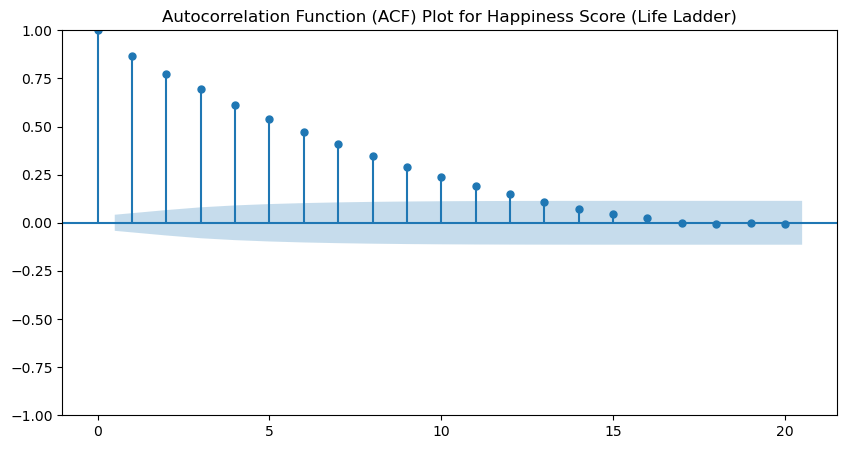

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fixed Autocorrelation Function (ACF) Plot
df_cleaned = df[['Year', 'Life Ladder']].dropna()

# Plot the Autocorrelation Function (ACF)
fig, ax = plt.subplots(figsize=(10, 5))
sm.graphics.tsa.plot_acf(df_cleaned.set_index('Year')['Life Ladder'], lags=20, ax=ax)
plt.title("Autocorrelation Function (ACF) Plot for Happiness Score (Life Ladder)")
plt.show()



The **Autocorrelation Function (ACF) Plot** above helps us understand how past values in the time series are correlated with future values over different lags.

#### **Observations:**
1. **Strong Positive Autocorrelation at Lower Lags:** 
   - The first few lags (especially lags 1-5) show **high positive autocorrelation**, indicating that past happiness scores have a strong influence on the future values. This suggests a trend in the data.
   
2. **Gradual Decline in Correlation:**
   - As we move to higher lags, the autocorrelation gradually **decreases**, meaning the further we move in time, the weaker the relationship between past and future happiness scores.

3. **Significance of Blue Shaded Area:**
   - The **blue shaded region represents the confidence interval**. Any bars **outside** this region are statistically significant. Since the first several lags exceed this region, we confirm the presence of autocorrelation.

#### **Conclusion:**
- The presence of significant autocorrelation suggests that the data may still exhibit trends, even after differencing.
- This confirms the need for further **transformation or modeling** (e.g., ARIMA) to fully prepare the data for forecasting.
- The next step would involve reviewing whether additional differencing is required to remove remaining autocorrelations.
